In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import mnist

In [3]:
# Split into test and training sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

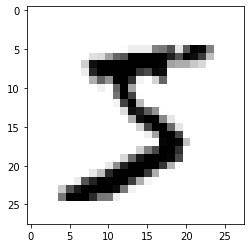

In [5]:
single_image = x_train[0]
plt.imshow(single_image, cmap='gray_r')

In [6]:
y_train # integer number confuses CNN

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# Encode labels by one-hot-encoding
from keras.utils.np_utils import to_categorical
y_test_cat = to_categorical(y_test, 10) # Possible ve 10 number
y_train_cat = to_categorical(y_train, 10) # Possible ve 10 number

In [8]:
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
# Now we need to normalize arrays of the images
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

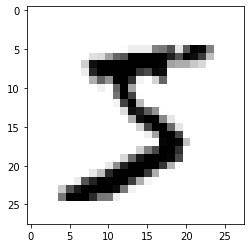

In [10]:
scaled_image = x_train[0]
plt.imshow(scaled_image, cmap='gray_r')

In [11]:
# Reshape and add color channels to the X_train & X_test

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train = x_train.reshape((60000, 28, 28, 1))

In [14]:
x_test = x_test.reshape((10000, 28, 28, 1))

In [15]:
x_test.shape

(10000, 28, 28, 1)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())

In [18]:
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train_cat, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2642 - accuracy: 0.9175
Epoch 2/2
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0501 - accuracy: 0.9845


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0449 - accuracy: 0.9843


[0.04489395022392273, 0.9843000173568726]

In [24]:
predictions = model.predict_classes(x_test)

C:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

